In [3]:
from encoder import Model
from utils import preprocess
import numpy as np
import utils
import seaborn as sns
import math
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
model = Model()

ValueError: Variable model/embedding/w already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "/home/aurora/Music/html end data/riseml/encoder.py", line 23, in embd
    "w", [hps.nvocab, ndim], initializer=load_params)
  File "/home/aurora/Music/html end data/riseml/encoder.py", line 98, in model
    words = embd(X, hps.nembd)
  File "/home/aurora/Music/html end data/riseml/encoder.py", line 176, in __init__
    cells, states, logits = model(X, S, M, reuse=False)


In [5]:
out_text = "Show an example of a longer sentence, and show what you want it to look like instead. The example here seems totally fine and it's hard to get a picture of what you want with the information provided. For example, do you want to insert newlines? Do you want to be able to scroll through a longer sentence? "

In [6]:
sentiment_neuron_index = 2388

In [7]:
def get_tracked_neuron_values_for_a_review(model, review_text, track_indices):
    feats, tracked_indices_values = model.transform([review_text], track_indices=track_indices)
    return np.array([np.array(vals).flatten() for vals in tracked_indices_values])

In [8]:
neuron_values = get_tracked_neuron_values_for_a_review(model, out_text, [sentiment_neuron_index])[0]

19.891 seconds to transform 1 examples


In [9]:
neuron_values

array([ 1.25873582e-02,  3.54458205e-02,  9.67460498e-02,  1.09809220e-01,
        1.06984690e-01,  1.04571640e-01,  1.22914851e-01,  1.56532228e-01,
        9.14330706e-02,  9.38563645e-02,  8.67169201e-02,  7.58174807e-02,
        7.69933611e-02, -3.16866040e-02, -4.41331491e-02, -4.48063351e-02,
       -4.11727279e-02,  9.56814513e-02,  6.89220279e-02,  7.36887753e-02,
        7.63933286e-02,  7.97699988e-02,  7.27162585e-02,  9.54217613e-02,
        1.03988536e-01,  1.10017121e-01,  1.10814132e-01,  1.47091836e-01,
        1.65025890e-01,  1.67410433e-01,  1.60119101e-01,  1.60366222e-01,
        1.52030706e-01,  1.54916495e-01,  1.56540632e-01,  1.48761049e-01,
        1.27519161e-01,  2.01172054e-01,  1.18105330e-01,  1.28512532e-01,
        1.43110156e-01,  1.43505782e-01,  1.61354795e-01,  1.38319895e-01,
        1.26231283e-01,  1.21347614e-01,  1.21751837e-01,  1.20558269e-01,
        1.29459083e-01,  1.29192904e-01,  1.52273089e-01,  1.55596614e-01,
        1.55952021e-01,  

In [10]:
count = len(neuron_values)

In [11]:
hello = list(out_text)

In [12]:
def plot_neuron_heatmap(text, values, savename=None, negate=False, cell_height=.112, cell_width=.92):
    #n_limit = 832
    cell_height=.325
    cell_width=.15
    n_limit = count
    num_chars = len(text)
    text = list(map(lambda x: x.replace('\n', '\\n'), text))
    num_chars = len(text)
    total_chars = math.ceil(num_chars/float(n_limit))*n_limit
    mask = np.array([0]*num_chars + [1]*(total_chars-num_chars))
    text = np.array(text+[' ']*(total_chars-num_chars))
    values = np.array((values+[0])*(total_chars-num_chars))

    values = values.reshape(-1, n_limit)
    text = text.reshape(-1, n_limit)
    mask = mask.reshape(-1, n_limit)
    num_rows = len(values)
    plt.figure(figsize=(cell_width*n_limit, cell_height*num_rows))
    hmap=sns.heatmap(values, annot=text, mask=mask, fmt='', vmin=-5, vmax=5, cmap='RdYlGn',xticklabels=False, yticklabels=False, cbar=False)
    plt.subplots_adjust() 
    #plt.tight_layout()
    plt.savefig('fig1.png')
    #plt.show()

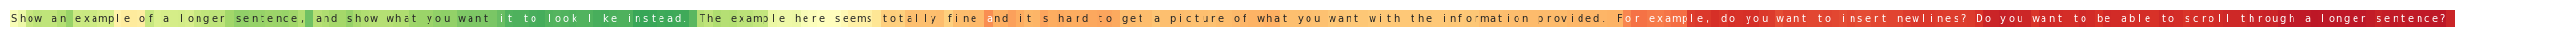

In [13]:
#map = plot_neuron_heatmap(review_text, neuron_values)
plot_neuron_heatmap(hello, neuron_values)